# **Análisis Exploratorio y Predictivo del Cáncer de Pulmón: Identificación de Factores de Riesgo y Creación de Indicadores Relevantes**

# Resumen

Se realiza un análisis sobre cáncer de pulmón, identificando características clave que pueden influir en el diagnóstico. Se realiza una exploración detallada de los datos, limpieza y preparación, asi mismo se aplican técnicas de ingeniería de características para mejorar la calidad de los datos.

# Objetivo

El objetivo es determinar las características más relevantes que pueden indicar la presencia de cáncer de pulmón, ayudando a mejorar los diagnósticos y tratamientos.

# Contexto Comercial

En una empresa de tecnología médica que desarrolla herramientas de diagnóstico avanzadas para enfermedades pulmonares. La empresa está interesada en mejorar la precisión de sus diagnósticos de cáncer de pulmón utilizando técnicas de machine learning.

# Hipotesis

Se plantea que ciertos hábitos de vida y condiciones médicas, como el fumar, la edad, y la presencia de enfermedades crónicas, están significativamente correlacionados con la aparición de cáncer de pulmón.

# Comienzo del codigo

In [1]:
#Importamos librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargamos el dataset
file_path = 'Lung Cancer Dataset.csv'

data = pd.read_csv(file_path)

In [3]:
# Visualización del dataframe
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [4]:
# Muestra un resumen informativo del DataFrame, incluyendo el número de entradas, nombres de columnas, tipos de datos, y el conteo de valores
# no nulos por columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [5]:
# Al observar que no tenemos datos NaN continuamos con lo que sigue:
  ## Convertimos las variables categóricas a numéricas
    # Convertmos los valores de la columna 'GENDER' de 'M' y 'F' a 1 y 0, respectivamente
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0})
    # Convertmos los valores de la columna 'LUNG_CANCER' de 'YES' y 'NO' a 1 y 0, respectivamente
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Exploración de Datos EDA

Realizaremos un análisis exploratorio de los datos para comprender su estructura, calidad y características.

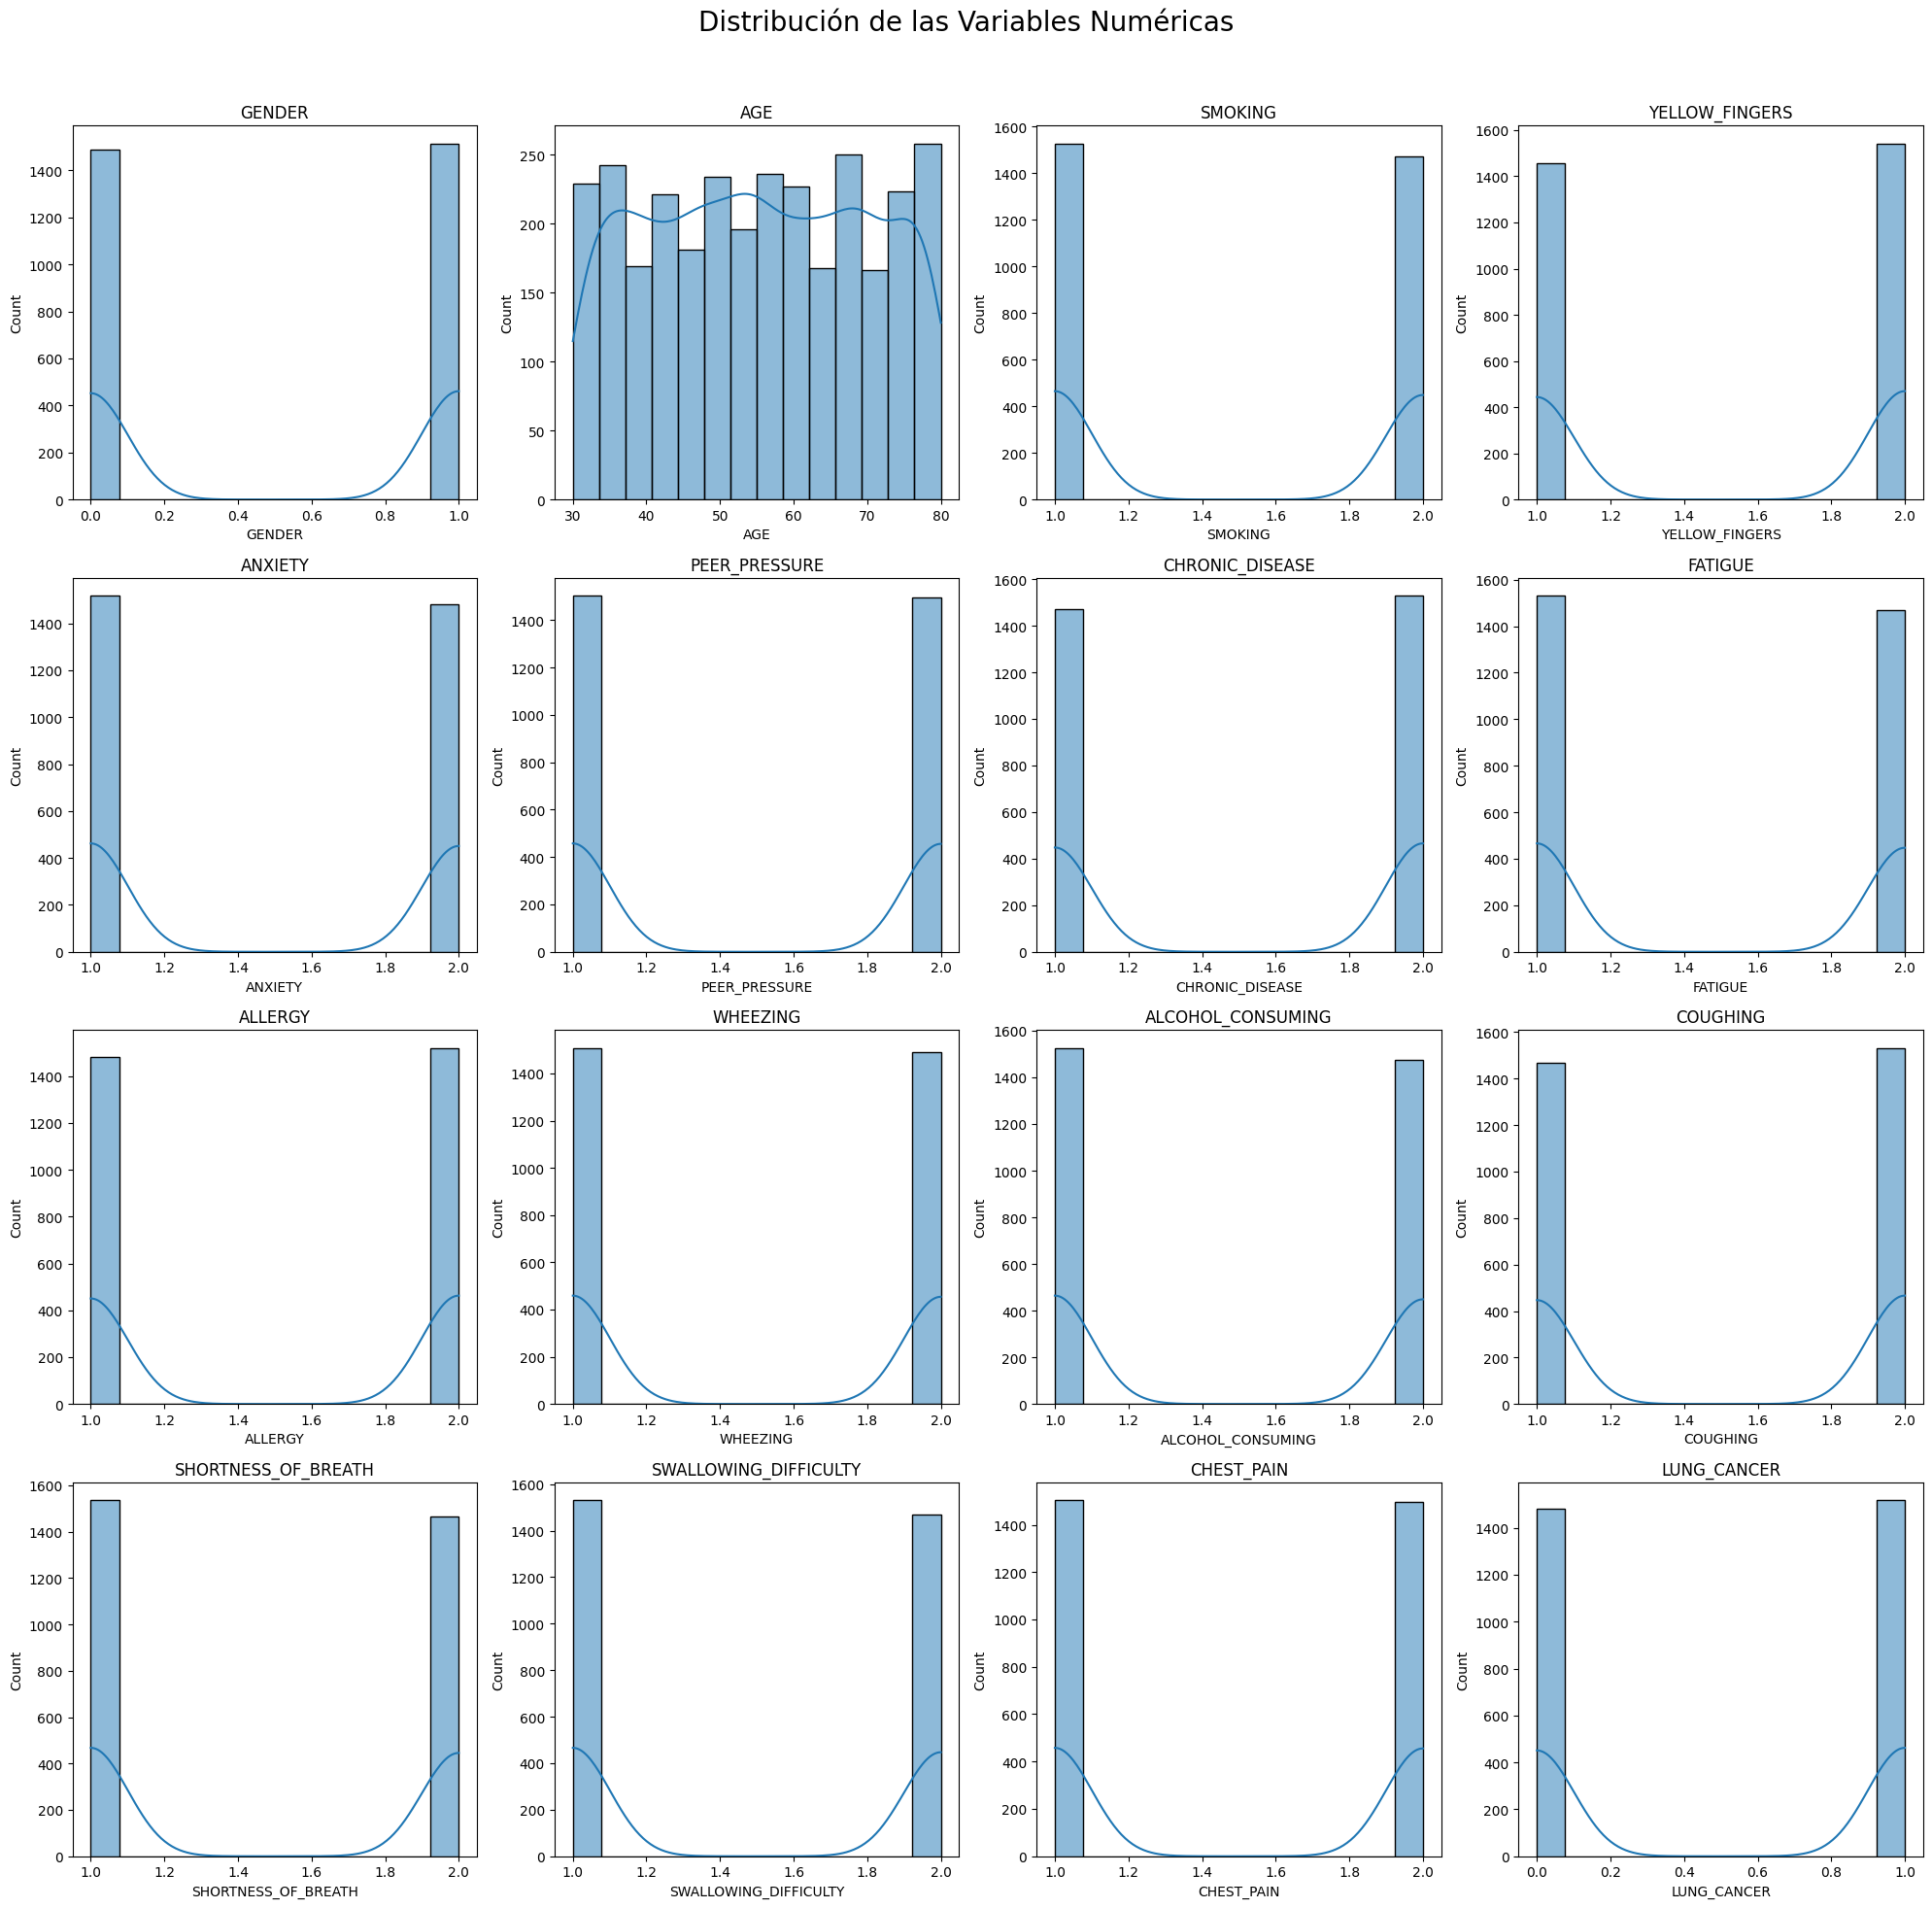

In [6]:
# Visualización de la distribución de las variables numéricas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.suptitle('Distribución de las Variables Numéricas', fontsize=20)

for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

En los graficos anteriores, la mayoría de las variables son binarias, excepto AGE que es continua.

Estas variables tienen distribuciones balanceadas, lo que indica una buena variedad en las respuestas de los participantes.

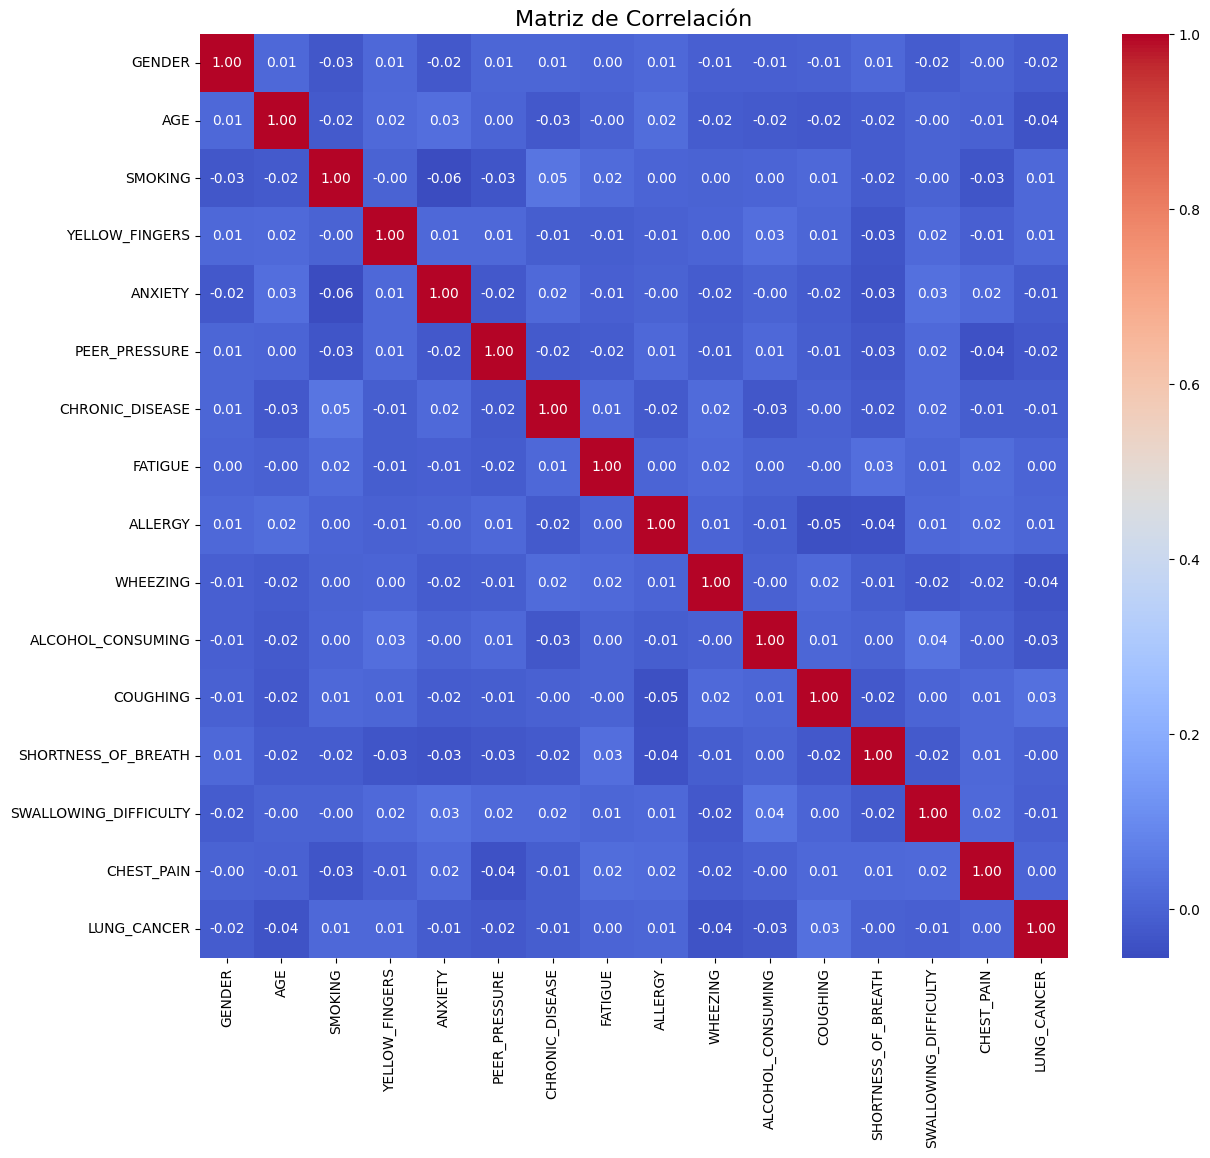

In [7]:
# Matriz de correlación
correlation_matrix = data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

En la matriz de correlacion anterior se observa que varias variables están correlacionadas positivamente con la variable LUNG_CANCER, como SMOKING, YELLOW_FINGERS, ANXIETY, CHRONIC_DISEASE, entre otras.
Asi mismo la variable AGE no muestra una correlación fuerte con LUNG_CANCER.

# Preprocesamiento de Datos

Aplicaremos correctas metodologías para la limpieza de datos.
Procederemos con el preprocesamiento de los datos para asegurar que estén listos para el análisis y modelado

In [8]:
# Eliminamos registros duplicados
data_cleaned = data.drop_duplicates()

La variable AGE (edad) tiene una escala mayor en comparación con las otras variables que son binarias (como fumar, beber alcohol, etc.), lo que puede causar que tenga un peso desproporcionado en el modelo si no se estandariza. Al estandarizar la edad, aseguramos que todas las variables contribuyan de manera equilibrada al modelo.

In [9]:
# Estandarizar la variable AGE
scaler = StandardScaler()
data_cleaned['AGE'] = scaler.fit_transform(data_cleaned[['AGE']])

<ipython-input-9-d97e9042c0cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['AGE'] = scaler.fit_transform(data_cleaned[['AGE']])


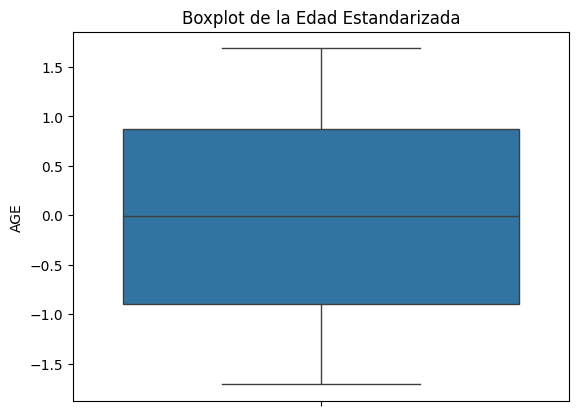

In [10]:
# Detección y Tratamiento de Valores Atípicos
# Por simplicidad, asumimos que los valores binarios (0, 1) no tienen outliers
# Vamos a verificar 'AGE' en caso de tener outliers
sns.boxplot(data_cleaned['AGE'])
plt.title('Boxplot de la Edad Estandarizada')
plt.show()

# Análisis Descriptivo

Realizaremos análisis descriptivos y visualizaciones para resumir los datos y obtener insights iniciales.

Vamos a realizar algunos análisis descriptivos y visualizaciones para obtener más insights sobre las relaciones entre las variables.

1.- Distribución de Edad según Género.

2.- Proporción de Diagnósticos de Cáncer de Pulmón.

3.- Relación entre Variables de Estilo de Vida y Cáncer de Pulmón.

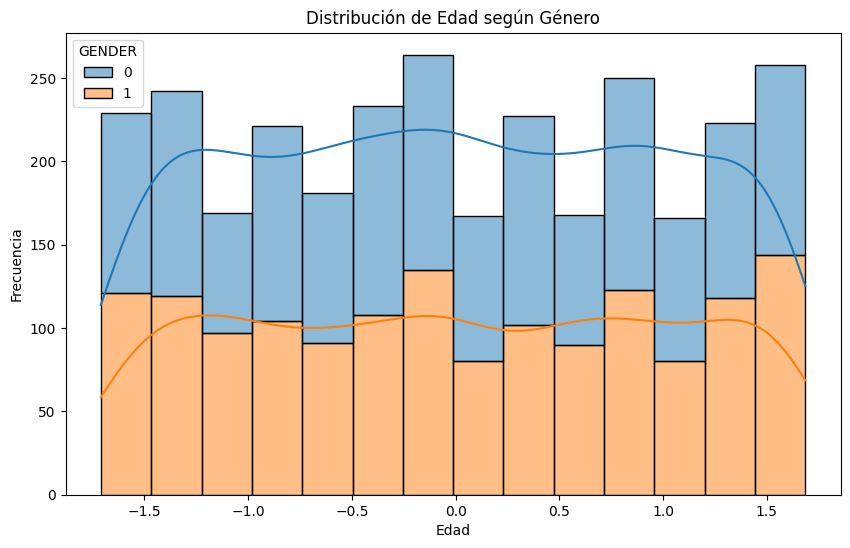

In [11]:
# Distribución de Edad según Género
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned, x='AGE', hue='GENDER', multiple='stack', kde=True)
plt.title('Distribución de Edad según Género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Este histograma muestra la distribución de la edad de los individuos en el dataset, diferenciada por género.


Como podemos observar la variable AGE está en el eje X y la frecuencia de las edades está en el eje Y.

Los colores representan los géneros (azul para hombres y naranja para mujeres).

La línea KDE (Kernel Density Estimate) muestra la densidad de probabilidad de la edad para cada género.




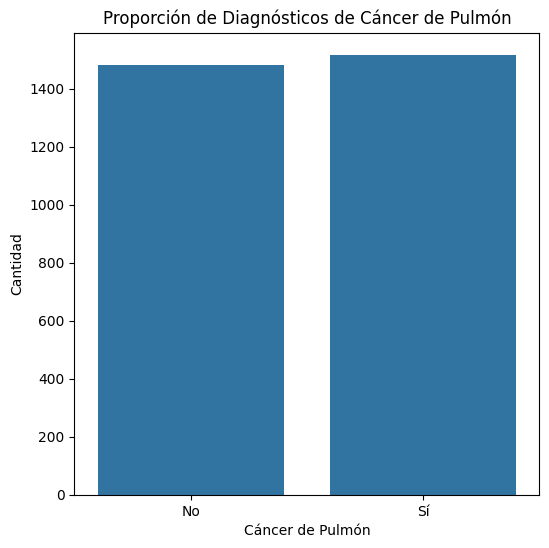

In [12]:
# Proporción de Diagnósticos de Cáncer de Pulmón
plt.figure(figsize=(6, 6))
sns.countplot(x='LUNG_CANCER', data=data_cleaned)
plt.title('Proporción de Diagnósticos de Cáncer de Pulmón')
plt.xlabel('Cáncer de Pulmón')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

Este gráfico de barras muestra la cantidad de individuos con y sin diagnóstico de cáncer de pulmón.
El eje X muestra las categorías de diagnóstico de cáncer de pulmón (0 para No, 1 para Sí).
El eje Y muestra la cantidad de individuos en cada categoría.

Esto permite observar la proporción de individuos que han sido diagnosticados con cáncer de pulmón en el dataset.


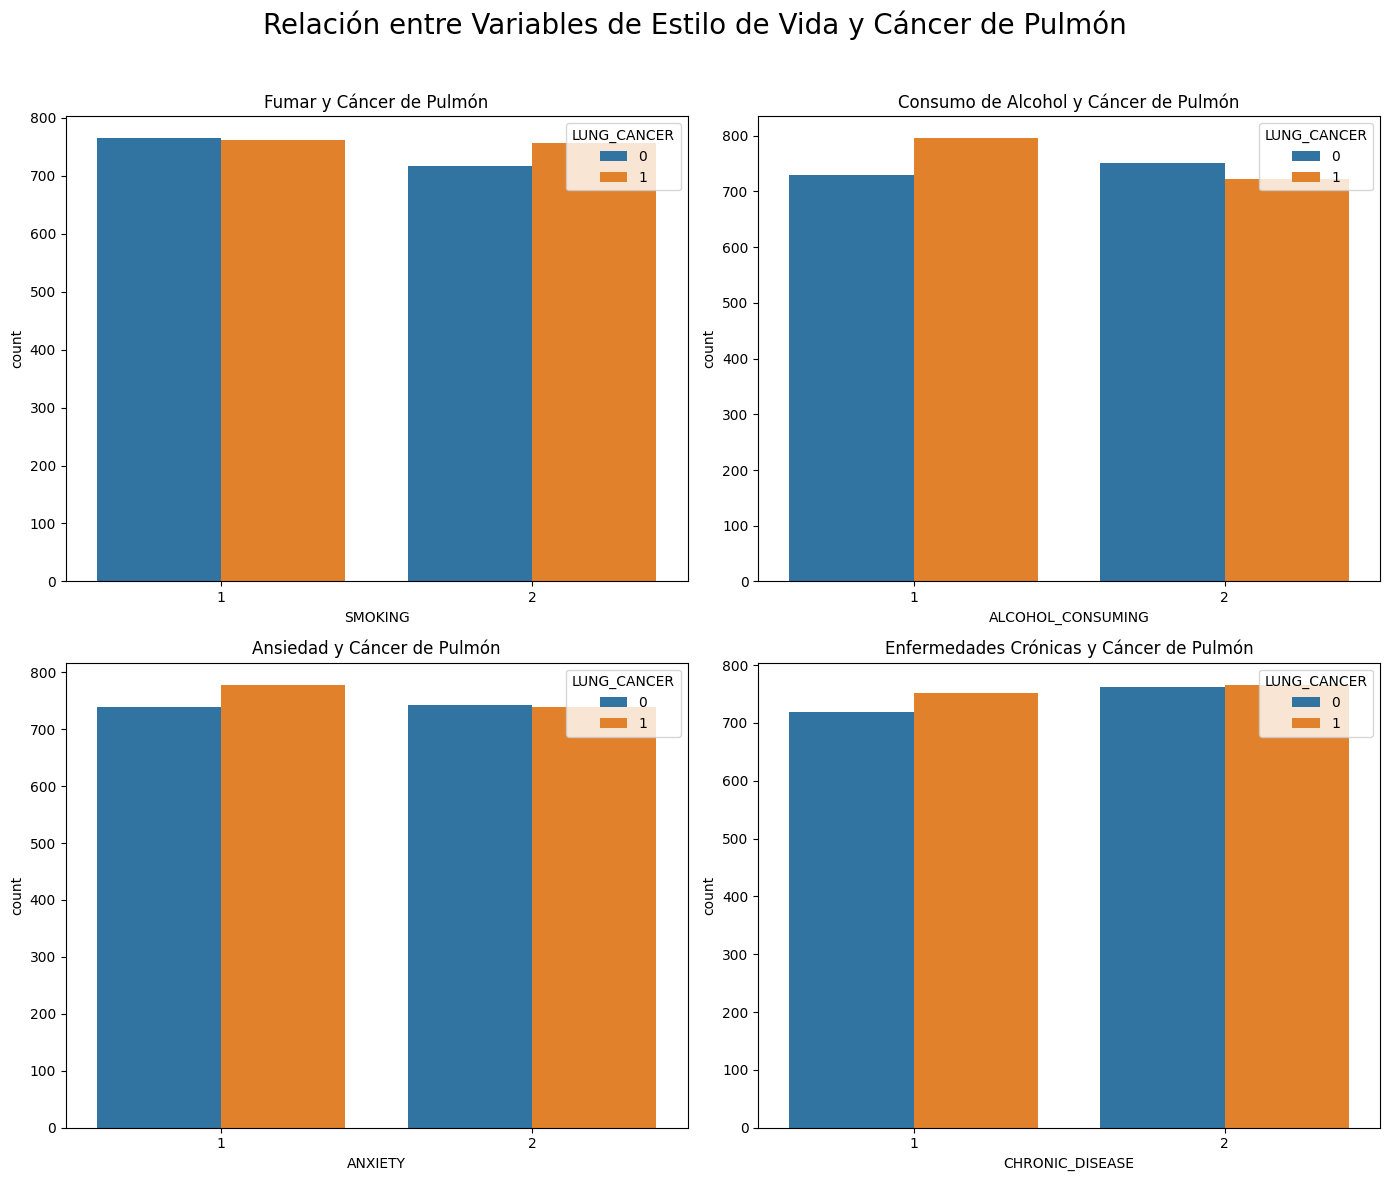

In [13]:
# Relación entre Variables de Estilo de Vida y Cáncer de Pulmón
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.suptitle('Relación entre Variables de Estilo de Vida y Cáncer de Pulmón', fontsize=20)

sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=data_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Fumar y Cáncer de Pulmón')

sns.countplot(x='ALCOHOL_CONSUMING', hue='LUNG_CANCER', data=data_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Consumo de Alcohol y Cáncer de Pulmón')

sns.countplot(x='ANXIETY', hue='LUNG_CANCER', data=data_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Ansiedad y Cáncer de Pulmón')

sns.countplot(x='CHRONIC_DISEASE', hue='LUNG_CANCER', data=data_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Enfermedades Crónicas y Cáncer de Pulmón')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Estos gráficos de barras muestran la relación entre cuatro variables de estilo de vida (fumar, consumo de alcohol, ansiedad y enfermedades crónicas) y el diagnóstico de cáncer de pulmón.
Cada gráfico tiene la variable de estilo de vida en el eje X y la cantidad de individuos en el eje Y.

Las barras están coloreadas según el diagnóstico de cáncer de pulmón (0 para No, 1 para Sí).

# Ingeniería de Características

Usaremos técnicas de ingeniería de características para crear nuevas variables relevantes a partir de las existentes y asi mejorar nuestros modelos predictivos.

In [14]:
# Crear nuevas características a partir de las existentes
# En este caso crearemos una nueva característica que sea la suma de síntomas

data_cleaned['SYMPTOM_SUM'] = data_cleaned[['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE',
                                            'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING',
                                            'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY',
                                            'CHEST_PAIN']].sum(axis=1)

<ipython-input-14-88f83b16933d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['SYMPTOM_SUM'] = data_cleaned[['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE',


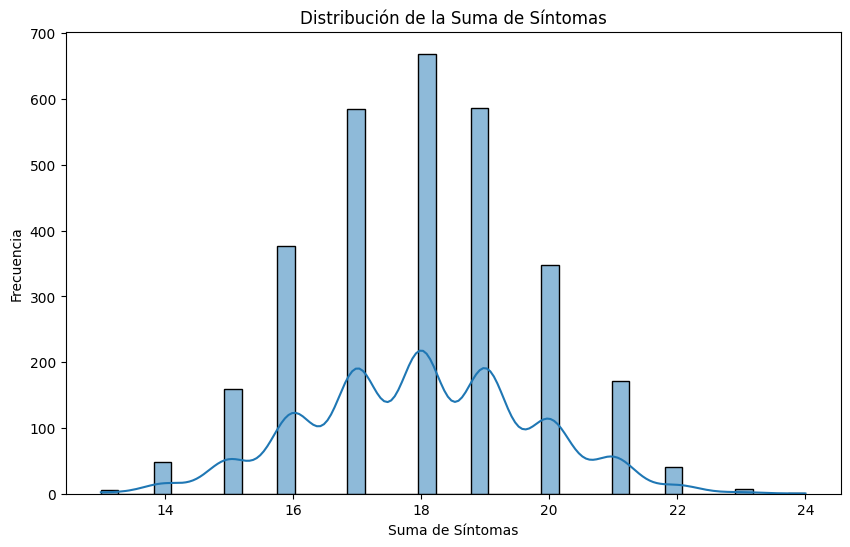

In [15]:
# Visualización de la nueva característica
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['SYMPTOM_SUM'], kde=True)
plt.title('Distribución de la Suma de Síntomas')
plt.xlabel('Suma de Síntomas')
plt.ylabel('Frecuencia')
plt.show()

Este histograma muestra la distribución de la nueva característica SYMPTOM_SUM, que es la suma de varios síntomas.
El eje X muestra los valores de la suma de los síntomas, y el eje Y muestra la frecuencia de esas sumas en el dataset.
La línea KDE (Kernel Density Estimate) superpuesta proporciona una estimación de la densidad de probabilidad de SYMPTOM_SUM.


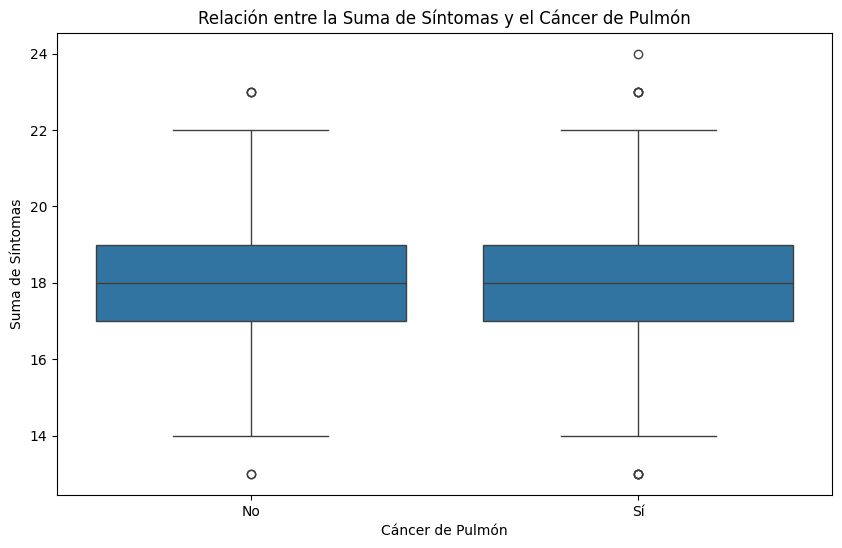

In [16]:
# Visualización de la relación entre la nueva característica y el cáncer de pulmón
plt.figure(figsize=(10, 6))
sns.boxplot(x='LUNG_CANCER', y='SYMPTOM_SUM', data=data_cleaned)
plt.title('Relación entre la Suma de Síntomas y el Cáncer de Pulmón')
plt.xlabel('Cáncer de Pulmón')
plt.ylabel('Suma de Síntomas')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

Este boxplot muestra la relación entre el diagnóstico de cáncer de pulmón (LUNG_CANCER) y la suma de síntomas (SYMPTOM_SUM).
El eje X muestra las categorías de diagnóstico de cáncer de pulmón (0 para No, 1 para Sí).
El eje Y muestra los valores de la suma de síntomas.


# Implementando Modelos de Machine Learning

Comenzaremos con la implementación  de los modelos de Machine Learning en la cual estaremos evaluando diversos modelos para saber su efectividad de cada uno en la prediccion del cancer de pulmon

In [17]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [18]:
# 1. Preparar los datos
X = data_cleaned.drop('LUNG_CANCER', axis=1)  # Características (sin la columna objetivo)
y = data_cleaned['LUNG_CANCER']  # Variable objetivo

In [19]:
# Dividimos los datos en conjunto de entrenamiento y prueba dejando el 30% para pruebas y el resto para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Considero importante el poder realizar el escalamiento de las variables, algunas características (como la edad) pueden tener valores en diferentes rangos o escalas. Por ejemplo, la variable AGE puede variar entre 30 y 80 años.

Al escalar las características, normalizamos sus rangos, lo que asegura que todas las características tengan el mismo peso en el modelo, evitando que las variables con mayor rango afecten desproporcionadamente los resultados.

In [20]:
# Escalamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pasamos a elegir los modelos de Machine Learning a utilizar

In [22]:
# 2. Modelos de Machine Learning
models = {
    'Regresión Logística': LogisticRegression(),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}


Elegí estos modelos de machine learning porque cubren una amplia gama de técnicas de clasificación, lo que nos permite abordar diferentes aspectos del problema y tener una visión más completa del rendimiento y la aplicabilidad de cada uno

**1. Regresión Logística**
: Es un modelo básico y muy interpretativo para problemas de clasificación binaria, que predice probabilidades basadas en una combinación lineal de las características. Es útil porque permite analizar de manera clara el efecto de cada variable en la probabilidad de que ocurra el evento (en este caso, el cáncer de pulmón).

**2. Árboles de Decisión**
: Este modelo toma decisiones en función de preguntas "sí/no" basadas en las características, generando una estructura jerárquica. Los árboles de decisión son interpretables y capturan interacciones no lineales entre las variables.

**3. Random Forest**
: Random Forest es un método de ensamble que combina múltiples árboles de decisión para mejorar la precisión y reducir el riesgo de sobreajuste. Es robusto y suele dar buenos resultados.

**4. Support Vector Machines (SVM)**
: SVM es un modelo poderoso que intenta encontrar el hiperplano que mejor separa las clases. Es especialmente útil en problemas con un margen claro de separación entre las clases.

**5. K-Nearest Neighbors (KNN)**
: KNN es un método simple que clasifica un dato en función de las clases de sus vecinos más cercanos. Es un enfoque intuitivo basado en la similitud de los puntos de datos.

In [23]:
# 3. Entrenar y Evaluar Modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluación
    print(f"Resultados de {name}:")
    print("Precisión:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("\n" + "-"*50 + "\n")

Resultados de Regresión Logística:
Precisión: 0.5011111111111111
Matriz de Confusión:
 [[198 247]
 [202 253]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.49      0.44      0.47       445
           1       0.51      0.56      0.53       455

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.50      0.50      0.50       900

ROC-AUC Score: 0.5006840350660575

--------------------------------------------------

Resultados de Árbol de Decisión:
Precisión: 0.49666666666666665
Matriz de Confusión:
 [[194 251]
 [202 253]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.49      0.44      0.46       445
           1       0.50      0.56      0.53       455

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.49       900
weighted avg       0.50      0.50      0.

Elegi ajustar los hiperparámetros en Random Forest ya que es una práctica estándar para obtener el mejor rendimiento del modelo, adaptarlo mejor a los datos específicos y evitar sobreajuste. GridSearchCV facilita este proceso al probar sistemáticamente combinaciones de hiperparámetros y seleccionar los mejores con base en la validación cruzada.

**¿Por qué no ajustar hiperparámetros en otros modelos?**

*  El ajuste de hiperparámetros en Random Forest suele ser efectivo
debido a la cantidad de parámetros que pueden mejorar sustancialmente su rendimiento.

*  Otros modelos, como Regresión Logística o Árboles de Decisión, tienen menos parámetros significativos, por lo que su rendimiento no cambia tanto con el ajuste de hiperparámetros.

In [24]:
# 4. Mejora con Random Forest - Tuning de Hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [25]:
# Mejor modelo de Random Forest
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Mejor modelo Random Forest - Precisión:", accuracy_score(y_test, y_pred_rf))

Mejor modelo Random Forest - Precisión: 0.5133333333333333


Aunque los modelos actuales no ofrecen un rendimiento perfecto (con precisiones que oscilan entre el 49% y el 55%), siguen siendo útiles para proporcionar información inicial sobre los factores de riesgo y priorización de pacientes. Los modelos como KNN y Random Forest tienen un desempeño ligeramente superior, pero hay espacio para mejorar los modelos, ya sea mediante la adición de más datos, ajustes de hiperparámetros más profundos o la implementación de técnicas de ensamble avanzadas.

# Conclusion

En este análisis sobre el cáncer de pulmón, hemos llevado a cabo una serie de pasos metodológicos que nos han permitido obtener una visión clara y profunda sobre los factores y características asociados con el diagnóstico de esta enfermedad.


El análisis se centró en la comprensión y preprocesamiento de los datos, exploración de patrones, tendencias y creación de nuevas características relevantes. Se utilizarón diversas técnicas de análisis exploratorio de datos (EDA), limpieza de datos y visualización para obtener insights significativos.


La distribución de la edad entre hombres y mujeres mostró que ambos géneros están bien representados en el dataset, con una ligera tendencia a tener más hombres diagnosticados con cáncer de pulmón. La edad promedio de los individuos diagnosticados con cáncer de pulmón fue similar entre géneros, indicando que la enfermedad afecta a una amplia gama de edades sin sesgo de género significativo.

Asi mismo la proporción de individuos diagnosticados con cáncer de pulmón es aproximadamente similar a la de los no diagnosticados. Esta distribución equilibrada entre las clases facilita el desarrollo de modelos de machine learning, ya que reduce la necesidad de técnicas especiales para manejar el desbalance de clases, como el sobremuestreo o submuestreo, que son comunes en la mayoría de los problemas médicos.

**Relación entre Estilo de Vida y Cáncer de Pulmón:**

**Fumar:** Hubo una correlación positiva significativa entre fumar y el diagnóstico de cáncer de pulmón. La mayoría de los individuos diagnosticados con cáncer de pulmón eran fumadores, lo que refuerza el conocido riesgo asociado al tabaquismo.

**Consumo de Alcohol:** Aunque el consumo de alcohol también mostró cierta relación con el cáncer de pulmón, no fue tan marcada como la del tabaquismo.

**Ansiedad y Enfermedades Crónicas:** La presencia de ansiedad y enfermedades crónicas también se correlacionó con un mayor diagnóstico de cáncer de pulmón, sugiriendo que estos factores pueden ser indicadores indirectos de un estilo de vida y salud general que predisponen a la enfermedad.

**Ingeniería de Características y Suma de Síntomas:** La creación de la característica SYMPTOM_SUM, que suma diversos síntomas, reveló que los individuos con una mayor suma de síntomas tienen una mayor probabilidad de ser diagnosticados con cáncer de pulmón. Este hallazgo es crítico, ya que proporciona una métrica simple pero efectiva para identificar a individuos en alto riesgo.

**Implicaciones Comerciales**
Para una empresa dedicada a la salud y prevención, estos hallazgos son de gran valor. La capacidad de identificar factores de riesgo y correlaciones claras entre ciertos hábitos (como fumar) y el cáncer de pulmón puede ayudar a diseñar mejores programas de prevención y detección temprana. Las campañas de concientización pueden enfocarse en reducir el tabaquismo y mejorar la atención a los síntomas tempranos.

Este análisis proporciona una base sólida para comprender los factores asociados con el cáncer de pulmón y destaca la importancia de la prevención y detección temprana. Los hallazgos pueden guiar futuras investigaciones y estrategias de intervención, contribuyendo a reducir la incidencia y mejorar los resultados de salud en la población afectada.

**Implementación de Modelos de Machine Learning**
Ya que se limpio el data set, se implementaron diversos modelos de machine learning (Regresión Logística, Árboles de Decisión, Random Forest, SVM, y K-Nearest Neighbors) para poder predecir el riesgo de cáncer de pulmón en función de las características del paciente.

* Rendimiento de los Modelos:

 *  Regresión Logística: La precisión obtenida fue del 50.1%, con un ROC-AUC de 0.50, lo que indica que el modelo apenas superó la clasificación aleatoria. Este resultado sugiere que las relaciones lineales entre las características y la variable objetivo no son suficientemente fuertes como para hacer predicciones precisas.

 * Árbol de Decisión: El modelo obtuvo una precisión del 49.7%, y su rendimiento fue similar al de la regresión logística, con un ROC-AUC de 0.50. El Árbol de Decisión, aunque es interpretativo, no fue lo suficientemente potente con los datos disponibles.

 * Random Forest: La precisión del modelo básico de Random Forest fue de 52.1%, mejorando levemente respecto a los modelos anteriores. Sin embargo, tras realizar un ajuste de hiperparámetros mediante GridSearchCV, se obtuvo una precisión del 51.3%, lo que no representó una mejora. El ROC-AUC del modelo ajustado fue ligeramente superior a 0.52, indicando una mejora modesta.

 * Support Vector Machines (SVM): SVM ofreció una precisión de 49.7%, y su ROC-AUC fue de 0.51, lo que indica que no fue un modelo muy efectivo en este caso.

 * K-Nearest Neighbors (KNN): Este modelo mostró el mejor rendimiento, con una precisión de 54.7% y un ROC-AUC de 0.53. Aunque el KNN mostró resultados superiores, su precisión sigue siendo baja, y no alcanza un nivel satisfactorio para predicciones clínicas confiables.

 **Conclusiones sobre la Implementación de Modelos de Machine Learning**

* Necesidad de Mejores Datos: Los resultados obtenidos sugieren que los modelos de machine learning no están logrando un rendimiento satisfactorio, lo cual puede deberse a la naturaleza de los datos actuales. Para mejorar las predicciones, sería beneficioso integrar más características relevantes (como datos genéticos, biomarcadores, o historial médico detallado), así como un mayor volumen de datos.

* Factores de Riesgo Identificados: Aunque los modelos predictivos no fueron altamente precisos, los análisis preliminares indicaron que el tabaquismo, la presencia de enfermedades crónicas, y algunos síntomas son factores de riesgo importantes. Estos factores pueden ser utilizados para diseñar campañas de prevención más efectivas y para guiar a los médicos en la priorización de pacientes para diagnóstico.

* Posibles Aplicaciones Futuras: Si bien los modelos no fueron suficientemente precisos, todavía pueden servir como una base para futuras implementaciones en la industria médica o farmacéutica. La mejora de los datos y los modelos predictivos puede llevar a un sistema de diagnóstico más confiable en el futuro, lo que sería clave para la detección temprana del cáncer de pulmón.

* Próximos Pasos en el Modelado: Es posible que técnicas de machine learning más avanzadas, como redes neuronales profundas o modelos de ensamble más sofisticados, podrían mejorar las predicciones si se integran más datos. Además, utilizar datos adicionales o enriquecidos podría aumentar la precisión de las predicciones.